# VGG16 and ImageNet

[ImageNet](http://www.image-net.org/challenges/LSVRC/) is an image classification and localization competition. [VGG16](http://www.robots.ox.ac.uk/~vgg/research/very_deep/) is a 16-layer network architecture and weights trained on the competition dataset by the Visual Geometry Group (VGG).

In this notebook we explore testing the network on samples images.

## Constructing the Network

First, we import the conx library:

In [1]:
import conx as cx

Using TensorFlow backend.
Conx, version 3.6.8


We can load in a number of predefined networks, including "VGG16" and "VGG19":

In [2]:
net = cx.Network.get("vgg16")

We get a warning letting us know that this is a trained model, but no training history exists. That is because this model was trained outside of Conx.

Let's see what this network looks like:

In [3]:
net.picture(rotate=True)

<IPython.core.display.Javascript object>

Predefined networks have an info method describing the network:

In [4]:
net.info()

**Network**: VGG16

   * **Status**: compiled 
   * **Layers**: 23 

This network architecture comes from the paper:

Very Deep Convolutional Networks for Large-Scale Image Recognition
by Karen Simonyan and Andrew Zisserman.

Their network was trained on the ImageNet challenge dataset.
The dataset contains 32,326 images broken down into 1,000 categories.

The network was trained for 74 epochs on the training data. This typically
took 3 to 4 weeks time on a computer with 4 GPUs. This network's weights were
converted from the original Caffe model into Keras.

Sources:
   * https://arxiv.org/pdf/1409.1556.pdf 
   * http://www.robots.ox.ac.uk/~vgg/research/very_deep/ 
   * http://www.image-net.org/challenges/LSVRC/ 
      * http://image-net.org/challenges/LSVRC/2014/ 
      * http://image-net.org/challenges/LSVRC/2014/browse-synsets 



We can see a complete summary of each layer:

In [5]:
net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

This network is huge! 138 million weights! 

But why does this have 23 layers when it is described as having 16? The original description only counted layers that have trainable weights. So, that doesn't include the input layer (1) nor the pooling layers (5) or the flatten layer (1). So:

In [6]:
23 - 1 - 5 - 1 

16

## Testing

Let's see what the network can do. Let's grab an image and propagate it through the network (I'll show you where this image came from in just a moment).

We download the picture:

In [7]:
cx.download("http://farm4.static.flickr.com/3426/3817878004_7dec9cdfbd.jpg", filename="geyser-1.jpg")

Using cached http://farm4.static.flickr.com/3426/3817878004_7dec9cdfbd.jpg as './geyser-1.jpg'.


In order to propagate it through the network, it needs to be resized to 224 x 224, so we can do that as we open it:

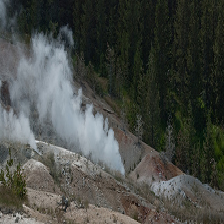

In [8]:
img = cx.image("geyser-1.jpg", resize=(224, 224))
img

To propagate it through the network it should be a 3D matrix:

In [9]:
array = cx.image_to_array(img)

This network comes with a special preprocess() method for getting the image values into the proper range:

In [10]:
array2 = net.preprocess(array)

And now, we are ready to propagate the array through the network:

In [11]:
output = net.propagate(array2)

What is this output?

In [12]:
len(output)

1000

We can pretty-format the output to see condensed view of the values:

In [13]:
print(net.pf(output))

[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00, 0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00, 0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00, 0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00, 0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00, 0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00, 0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00, 0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00, 0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00, 0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00, 0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00, 0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00, 0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00, 0.00,0.00,0

This network comes with a special method postprocess() that will take this values and look them up, giving us the category ID, and a nice human-readable label:

In [14]:
net.postprocess(output)

[('n09288635', 'geyser', 0.7626754641532898),
 ('n09246464', 'cliff', 0.08688867092132568),
 ('n09193705', 'alp', 0.03189372643828392),
 ('n09468604', 'valley', 0.027246791869401932),
 ('n03160309', 'dam', 0.01493859849870205)]

Indeed, this is a picture of a geyser!

We can see a picture of the entire network, with activations:


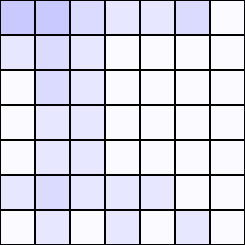
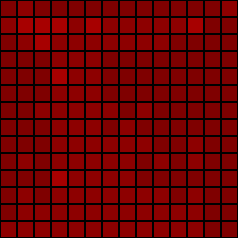
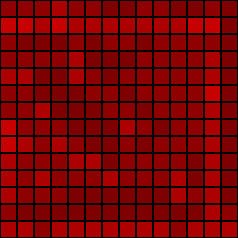
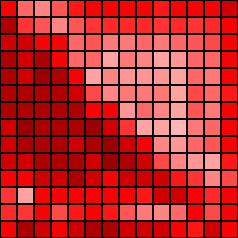
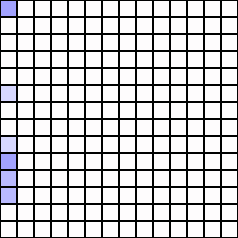
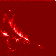
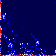
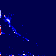
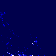
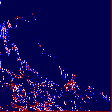
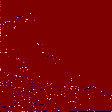
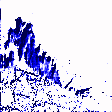
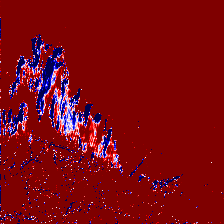
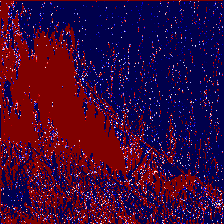
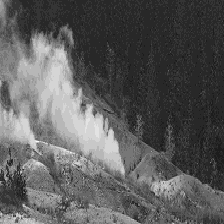

In [15]:
net.picture(array2, scale=0.25)

Why is the first layer gray? Because it is a regular input layer, with 3 channels, and it is showing the first channel. 

How does the network represent a picture? It re-represents the picture at every layer. Many layers are composed of features. For example, we can look at the first layer, `input_1`:

Feature 0,Feature 1,Feature 2

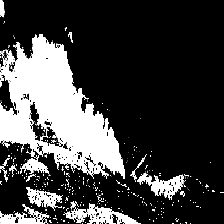
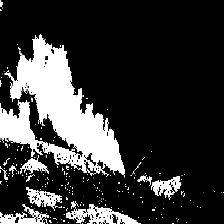
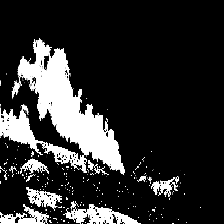

In [16]:
net.propagate_to_features("input_1", array2)

We don't get very good feature maps, because these image values are very large and outside the normal range. But we can automatically scale them by setting a minmax value on the layer:

Feature 0,Feature 1,Feature 2

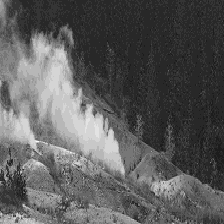
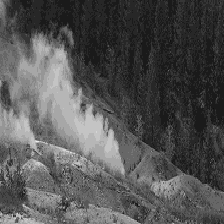
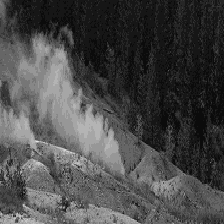

In [17]:
net["input_1"].minmax = (cx.minimum(array2), cx.maximum(array2))
net.propagate_to_features("input_1", array2)

Much better! In this example, a feature is a color channel. So feature 0 is Red, feature 1 is Green, and feature 2 is Blue.

We can also look at the first Convolutional layer, `block1_conv1`:


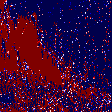
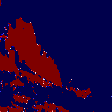
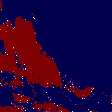
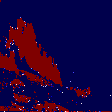
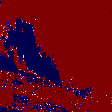
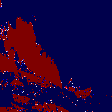
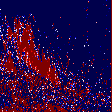
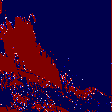
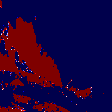
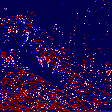
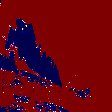
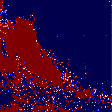
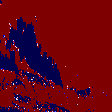
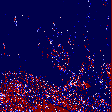
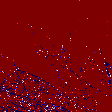
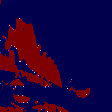
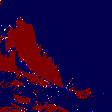
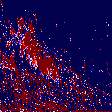
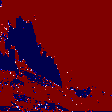
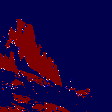
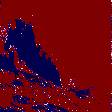
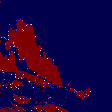
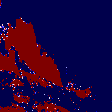
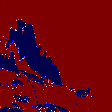
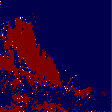
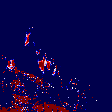
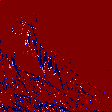
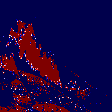
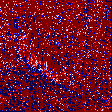
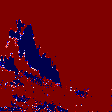
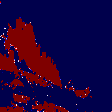
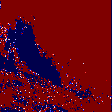
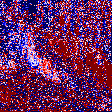
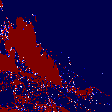
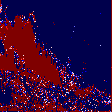
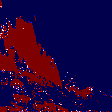
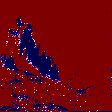
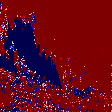
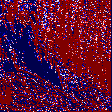
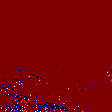
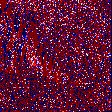
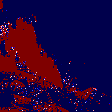
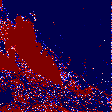
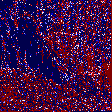
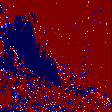
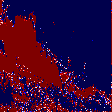
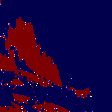
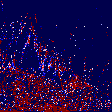
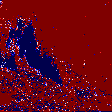
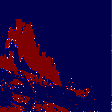
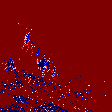
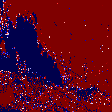
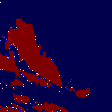
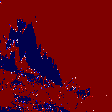
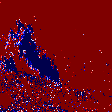
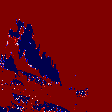
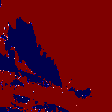
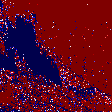
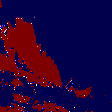
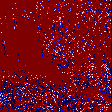
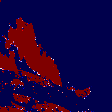
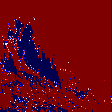
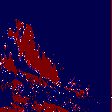
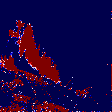

In [18]:
net.propagate_to_features("block1_conv1", array2, scale=0.5, cols=10)

We don't know what each of the 64 features represents here because it was learned. You might be able to see some patterns though. 

We can also look at the last Convolutional layer, `block5_pool`:

Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9
Feature 10,Feature 11,Feature 12,Feature 13,Feature 14,Feature 15,Feature 16,Feature 17,Feature 18,Feature 19
Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29
Feature 30,Feature 31,Feature 32,Feature 33,Feature 34,Feature 35,Feature 36,Feature 37,Feature 38,Feature 39
Feature 40,Feature 41,Feature 42,Feature 43,Feature 44,Feature 45,Feature 46,Feature 47,Feature 48,Feature 49
Feature 50,Feature 51,Feature 52,Feature 53,Feature 54,Feature 55,Feature 56,Feature 57,Feature 58,Feature 59
Feature 60,Feature 61,Feature 62,Feature 63,Feature 64,Feature 65,Feature 66,Feature 67,Feature 68,Feature 69
Feature 70,Feature 71,Feature 72,Feature 73,Feature 74,Feature 75,Feature 76,Feature 77,Feature 78,Feature 79
Feature 80,Feature 81,Feature 82,Feature 83,Feature 84,Feature 85,Feature 86,Feature 87,Feature 88,Feature 89
Feature 90,Feature 91,Feature 92,Feature 93,Feature 94,Feature 95,Feature 96,Feature 97,Feature 98,Feature 99
Feature 100,Feature 101,Feature 102,Feature 103,Feature 104,Feature 105,Feature 106,Feature 107,Feature 108,Feature 109

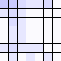
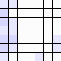
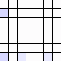
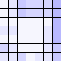
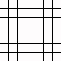
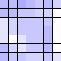
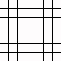
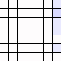
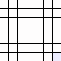
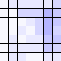
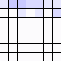
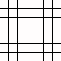
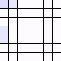
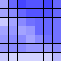
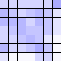
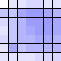
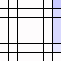
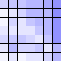
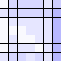
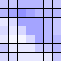
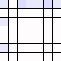
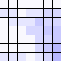
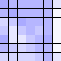
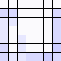
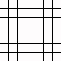
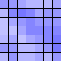
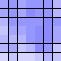
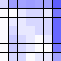
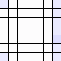
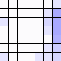
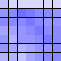
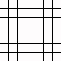
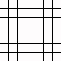
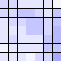
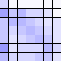
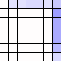
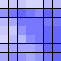
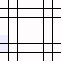
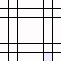
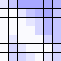
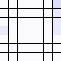
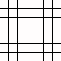
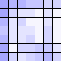
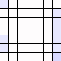
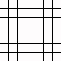
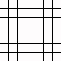
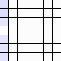
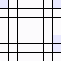
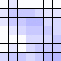
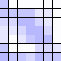
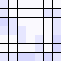
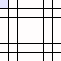
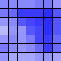
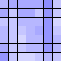
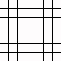
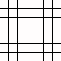
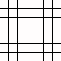
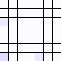
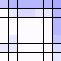
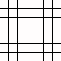
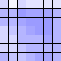
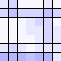
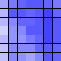
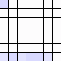
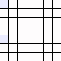
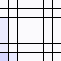
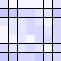
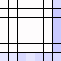
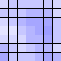
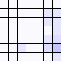
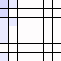
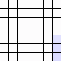
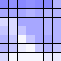
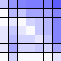
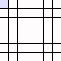
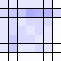
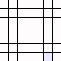
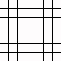
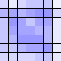
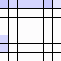
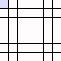
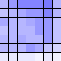
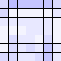
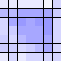
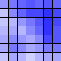
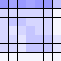
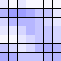
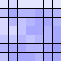
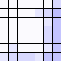
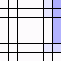
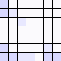
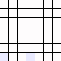
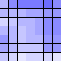
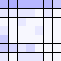
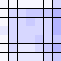
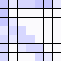
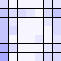
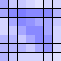
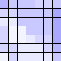
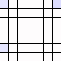
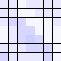
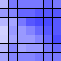
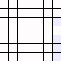
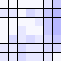
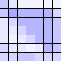
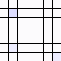
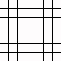
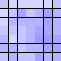
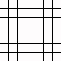
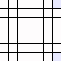
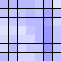
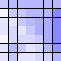
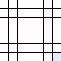
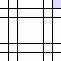
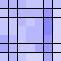
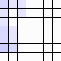
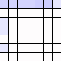
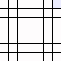
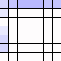
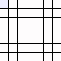
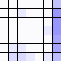
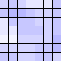
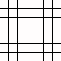
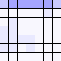
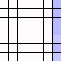
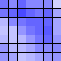
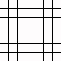
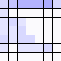
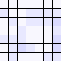
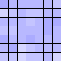
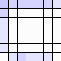
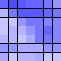
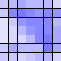
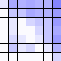
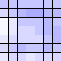
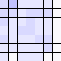
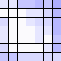
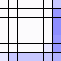
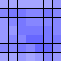
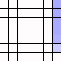
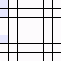
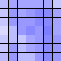
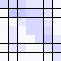
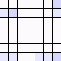
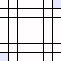
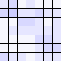
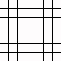
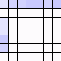
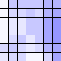
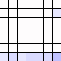
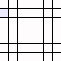
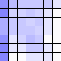
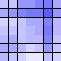
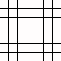
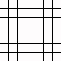
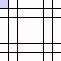
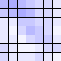
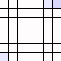
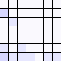
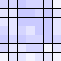
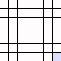
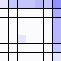
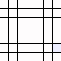
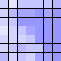
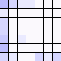
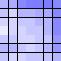
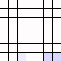
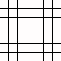
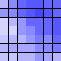
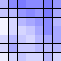
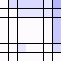
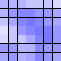
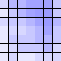
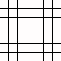
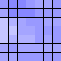
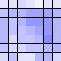
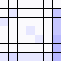
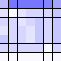
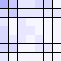
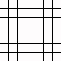
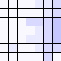
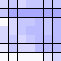
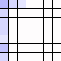
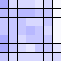
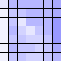
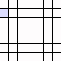
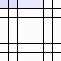
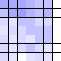
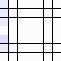
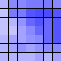
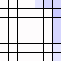
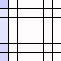
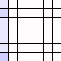
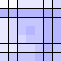
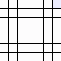
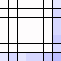
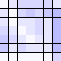
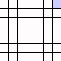
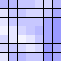
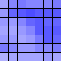
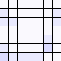
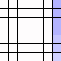
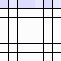
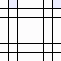
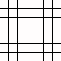
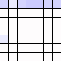
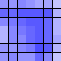
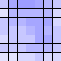
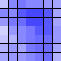
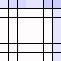
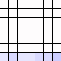
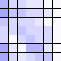
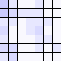
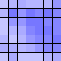
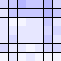
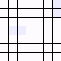
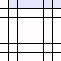
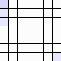
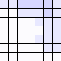
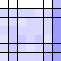
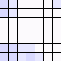
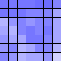
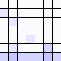
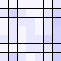
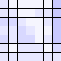
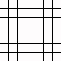
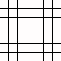
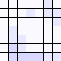
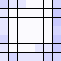
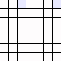
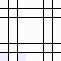
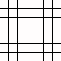
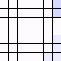
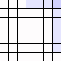
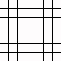
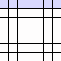
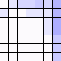
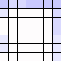
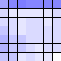
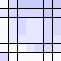
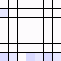
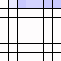
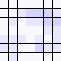
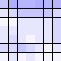
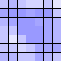
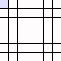
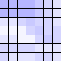
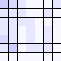
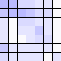
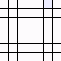
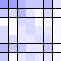
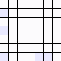
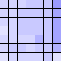
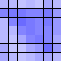
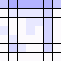
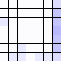
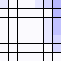
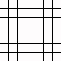
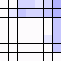
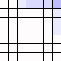
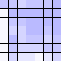
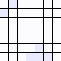
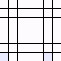
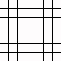
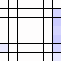
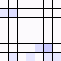
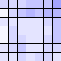
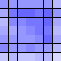
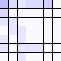
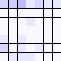
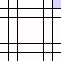
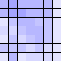
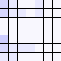
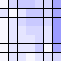
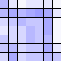
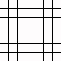
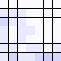
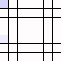
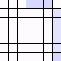
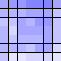
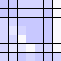
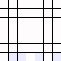
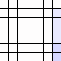
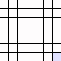
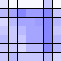
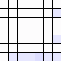
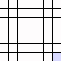
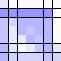
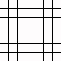
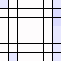
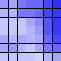
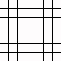
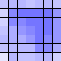
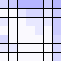
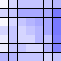
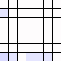
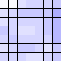
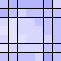
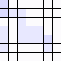
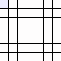
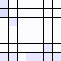
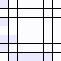
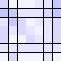
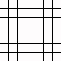
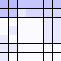
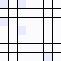
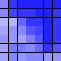
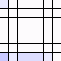
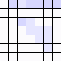
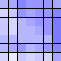
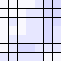
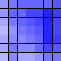
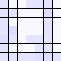
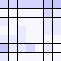
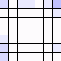
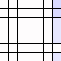
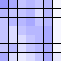
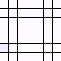
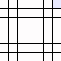
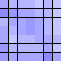
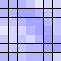
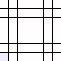
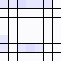
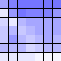
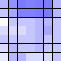
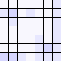
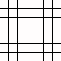
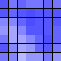
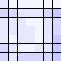
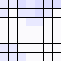
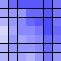
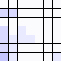
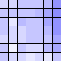
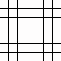
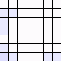
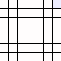
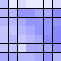
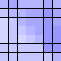
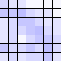
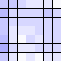
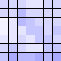
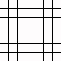
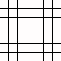
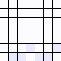
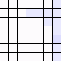
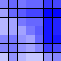
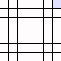
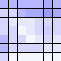
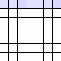
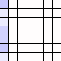
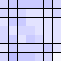
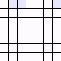
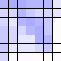
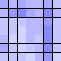
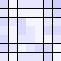
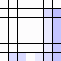
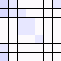
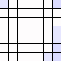
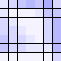
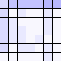
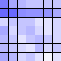
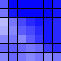
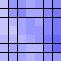
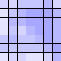
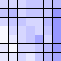
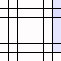
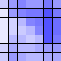
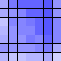
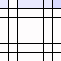
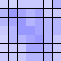
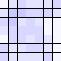
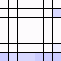
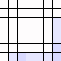
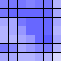
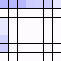
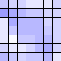
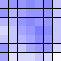
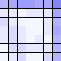
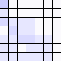
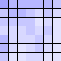
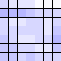
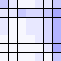
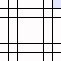
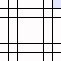
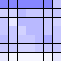
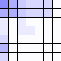
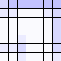
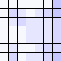
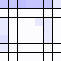
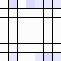
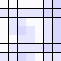
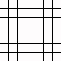
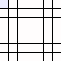
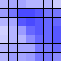
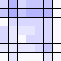
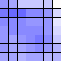
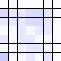
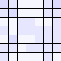
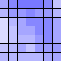
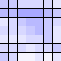
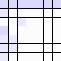
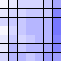
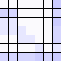
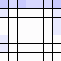
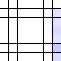
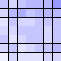
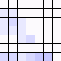
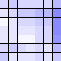
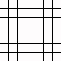
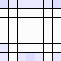
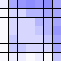
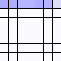
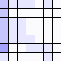
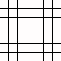
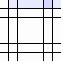
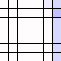
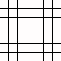
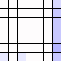
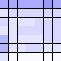
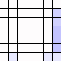
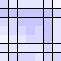
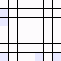
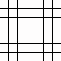
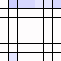
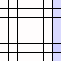
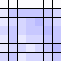
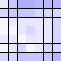
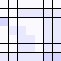
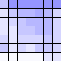
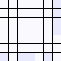
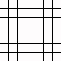
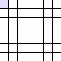
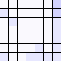
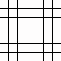
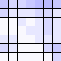
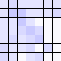
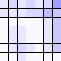
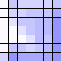
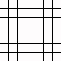
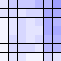
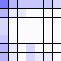
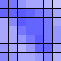
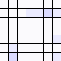
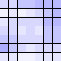
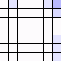
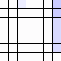
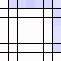
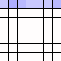
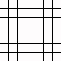
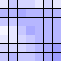
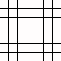
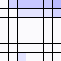
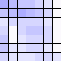
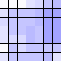
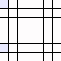
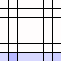
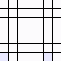
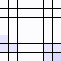
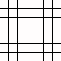
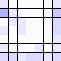
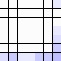
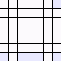
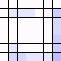
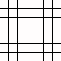
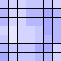
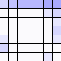
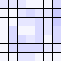
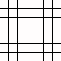
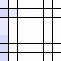
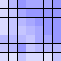
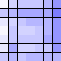
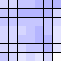
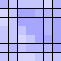
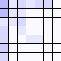
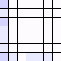
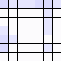
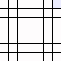
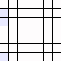
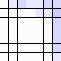
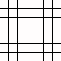
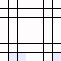
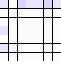
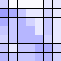
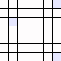
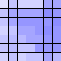
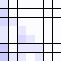
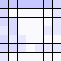
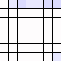
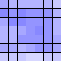
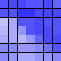
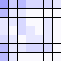
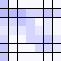
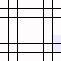
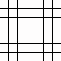
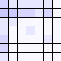
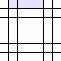
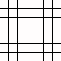
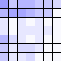
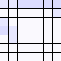
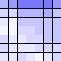
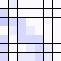
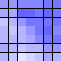
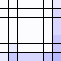
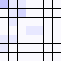
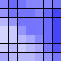
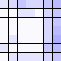
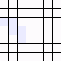
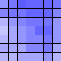
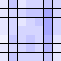
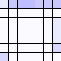
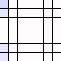
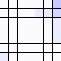

In [19]:
net.propagate_to_features("block5_pool", array2, scale=0.25, cols=10)

Again, these 512 features were learned.

Now, let's examine the output and the categories. We recall that the output of the network was:

In [20]:
net.postprocess(output)

[('n09288635', 'geyser', 0.7626754641532898),
 ('n09246464', 'cliff', 0.08688867092132568),
 ('n09193705', 'alp', 0.03189372643828392),
 ('n09468604', 'valley', 0.027246791869401932),
 ('n03160309', 'dam', 0.01493859849870205)]

We see that the label "geyser" is category ID "n09288635". We can see all of the images in this set with the following:

In [21]:
from IPython.display import IFrame

def show_category(category):
    return IFrame(src="http://imagenet.stanford.edu/synset?wnid=%s" % category, width="100%", height="500px")

In [22]:
show_category('n09288635')

Let's try another image, this time, a picture of a dog. First, I select one from the dog set:

In [23]:
cx.download("http://farm4.static.flickr.com/3657/3415738992_fecc303889.jpg", filename="dog.jpg")

Using cached http://farm4.static.flickr.com/3657/3415738992_fecc303889.jpg as './dog.jpg'.


Open it up as an image in the proper size:

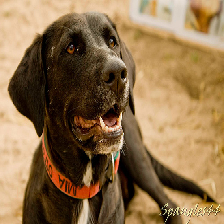

In [24]:
img = cx.image("dog.jpg", resize=(224,224))
img

Convert to array, and preprocess the array:

In [25]:
array = net.preprocess(cx.image_to_array(img))

And finally, propagate, and postprocess it:

In [26]:
net.postprocess(net.propagate(array))

[('n02100236', 'German_short-haired_pointer', 0.6061604619026184),
 ('n02099712', 'Labrador_retriever', 0.17321829497814178),
 ('n02109047', 'Great_Dane', 0.1112799122929573),
 ('n02100583', 'vizsla', 0.013886826112866402),
 ('n02099849', 'Chesapeake_Bay_retriever', 0.011956770904362202)]

Is that a German_short-haired_pointer? Let's compare:

In [27]:
show_category("n02100236")

That could be correct. To know for certain, we'd have to know what the target is for that image (or find it in the above pictures). You can download the training set of target categories and image URLs here:

http://image-net.org/download-imageurls

The fall 2011 dataset is 350 MB compressed, and 1.1 GB uncompressed. Searching through this file, we find that this image is actually 'n00015388_34057'. What is that? Let's see.

To explore all of the categories, we can download the JSON file describing them:

In [28]:
cx.download("https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json")

Using cached https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json as './imagenet_class_index.json'.


In [29]:
import json

In [30]:
data = json.load(open("imagenet_class_index.json"))

In [31]:
len(data)

1000

And here is all 1,000 labels:

In [32]:
print(sorted([label for (category,label) in data.values()]))

['Afghan_hound', 'African_chameleon', 'African_crocodile', 'African_elephant', 'African_grey', 'African_hunting_dog', 'Airedale', 'American_Staffordshire_terrier', 'American_alligator', 'American_black_bear', 'American_chameleon', 'American_coot', 'American_egret', 'American_lobster', 'Angora', 'Appenzeller', 'Arabian_camel', 'Arctic_fox', 'Australian_terrier', 'Band_Aid', 'Bedlington_terrier', 'Bernese_mountain_dog', 'Blenheim_spaniel', 'Border_collie', 'Border_terrier', 'Boston_bull', 'Bouvier_des_Flandres', 'Brabancon_griffon', 'Brittany_spaniel', 'CD_player', 'Cardigan', 'Chesapeake_Bay_retriever', 'Chihuahua', 'Christmas_stocking', 'Crock_Pot', 'Dandie_Dinmont', 'Doberman', 'Dungeness_crab', 'Dutch_oven', 'Egyptian_cat', 'English_foxhound', 'English_setter', 'English_springer', 'EntleBucher', 'Eskimo_dog', 'European_fire_salamander', 'European_gallinule', 'French_bulldog', 'French_horn', 'French_loaf', 'German_shepherd', 'German_short-haired_pointer', 'Gila_monster', 'Gordon_sette

In [40]:
labels = {label: category for (category,label) in data.values()}
categories = {category:label for (category,label) in data.values()}

If you don't recognize a label, you can look at the images in that dataset:

In [34]:
category = labels['rock_beauty']

In [35]:
show_category(category)

Thus, "rock_beauty" is a fish!

If we look up the dog picture's ID, we see that it is actually classified as "Animal, animate being, beast, brute, creature, fauna". However, it is not one of the 1,000 categories trained on. So, the network did very well on a novel image. 